In [ ]:
import pandas as pd





In [ ]:
data = pd.read_csv('train.csv')
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data.loc[:, 'Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])



In [ ]:
data.loc[:, 'Age'] = data['Age'].fillna(data['Age'].mean())


In [ ]:

data = data.drop(columns=['Cabin'], errors='ignore')


In [ ]:
data.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
print(data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
data.to_csv('train_cleaned.csv', index=False)



In [ ]:
data.shape


(891, 11)

In [ ]:
data.info()
data.describe()
data.nunique()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,681
Fare,248


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:

# Fill missing Age with mean
data.loc[:, 'Age'] = data['Age'].fillna(data['Age'].mean())

# Fill missing Embarked with most common value
data.loc[:, 'Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Drop Cabin column
data = data.drop(columns=['Cabin'], errors='ignore')

# Check if any missing values are left
print(data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
# See data summary
data.info()
data.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# See data summary
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


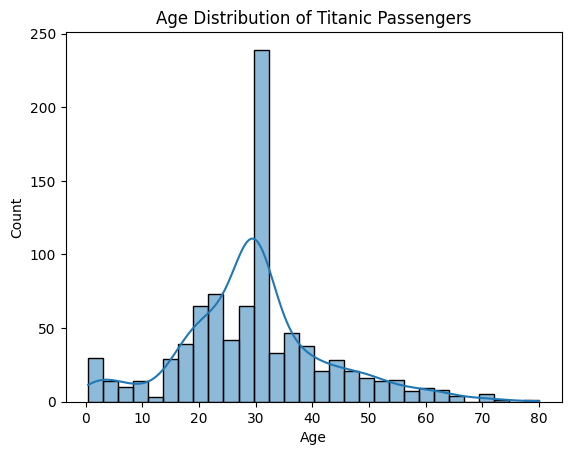

In [ ]:
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


1️⃣ Histogram - Age Distribution
Observation:

Most passengers were aged between 20 to 40 years.

Very few passengers were older than 60 years.

There are some children (below 10 years) as well.


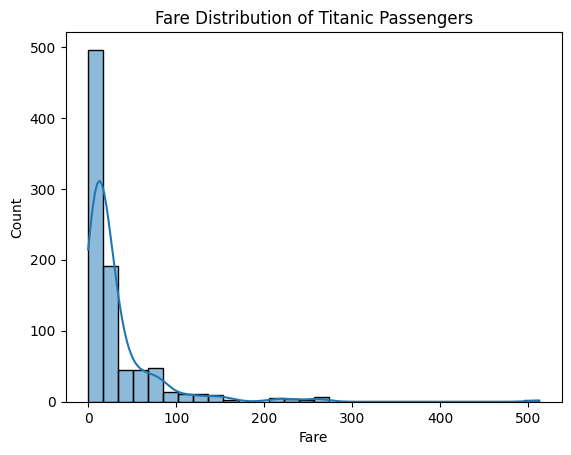

In [ ]:
sns.histplot(data['Fare'], bins=30, kde=True)
plt.title('Fare Distribution of Titanic Passengers')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()



2️⃣ Histogram - Fare Distribution
Observation:

Most passengers paid a fare below 100.

A few passengers paid very high fares (above 200), showing some outliers.

Fare distribution is right-skewed.




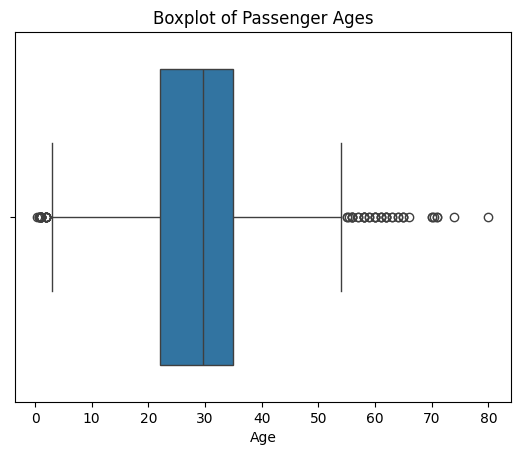

In [ ]:
sns.boxplot(x=data['Age'])
plt.title('Boxplot of Passenger Ages')
plt.xlabel('Age')
plt.show()


3️⃣ Boxplot - Age
Observation:

The median age of passengers is around 28 years.

Some outliers are present among very young passengers and very old passengers.

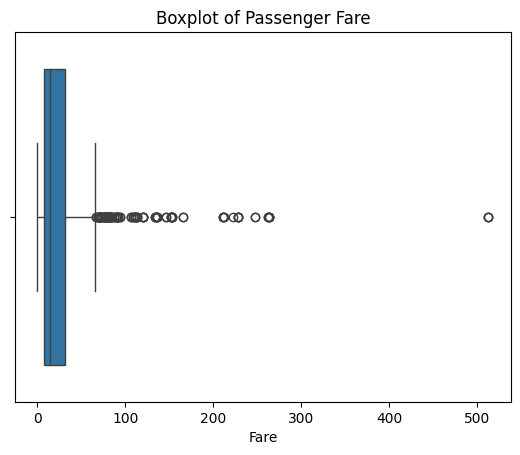

In [ ]:
sns.boxplot(x=data['Fare'])
plt.title('Boxplot of Passenger Fare')
plt.xlabel('Fare')
plt.show()


4️⃣ Boxplot - Fare
Observation:

The Fare feature shows many outliers where some passengers paid very high ticket prices.

Most fares are clustered below 100.

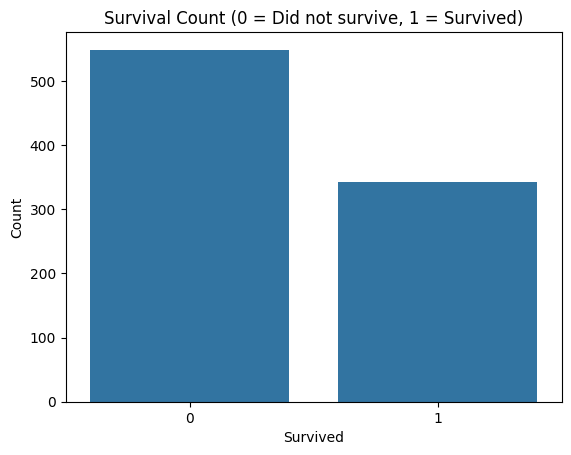

In [ ]:
sns.countplot(x='Survived', data=data)
plt.title('Survival Count (0 = Did not survive, 1 = Survived)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


4️⃣ Boxplot - Fare
Observation:

The Fare feature shows many outliers where some passengers paid very high ticket prices.

Most fares are clustered below 100.

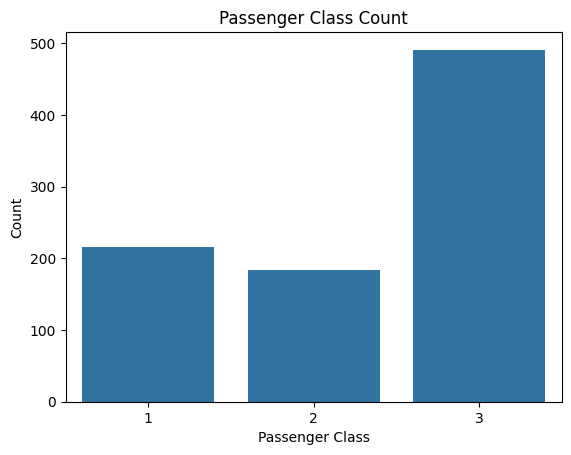

In [ ]:
sns.countplot(x='Pclass', data=data)
plt.title('Passenger Class Count')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


6️⃣ Countplot - Passenger Class (Pclass)
Observation:

Most passengers traveled in 3rd Class.

Few passengers were in 1st Class.

3rd class had the most people onboard.



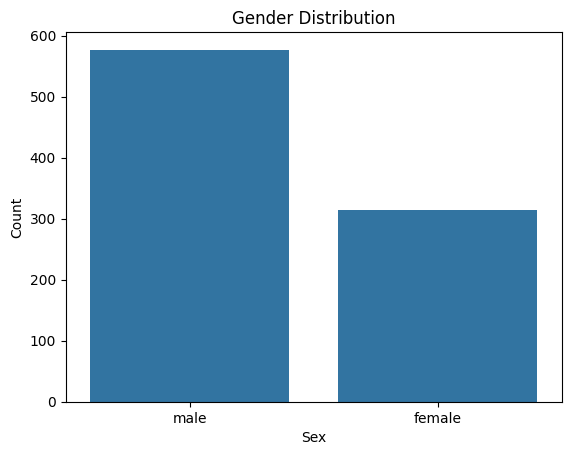

In [ ]:
sns.countplot(x='Sex', data=data)
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


7️⃣ Countplot - Gender (Sex)
Observation:

There were more male passengers than female passengers.

Males were almost twice as many as females.




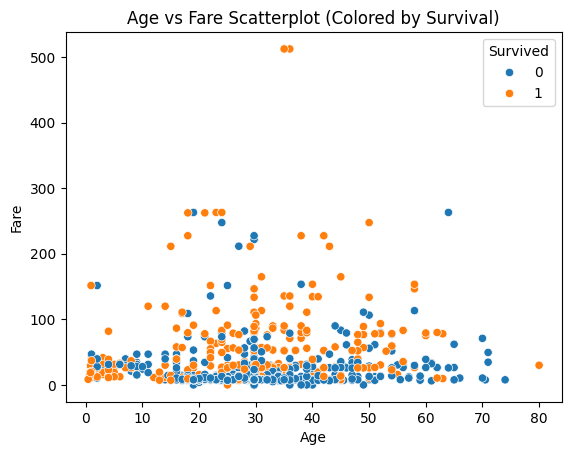

In [ ]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data)
plt.title('Age vs Fare Scatterplot (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


8️⃣ Scatterplot - Age vs Fare (Colored by Survival)
Observation:

Passengers who paid higher fares had a higher chance of survival.

There is no strong relationship between age and survival.

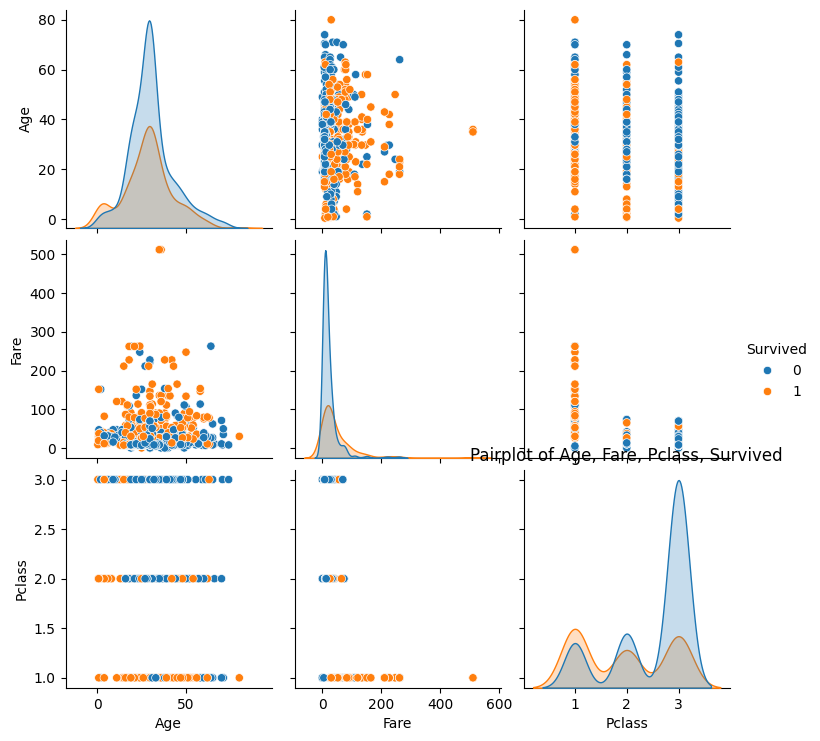

In [ ]:
sns.pairplot(data[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.title('Pairplot of Age, Fare, Pclass, Survived')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

9️⃣ Pairplot - Age, Fare, Pclass, Survived
Observation:

First-class passengers (Pclass = 1) survived more than third-class.

Higher Fare is positively linked with survival.

No clear relation between Age and Survival.



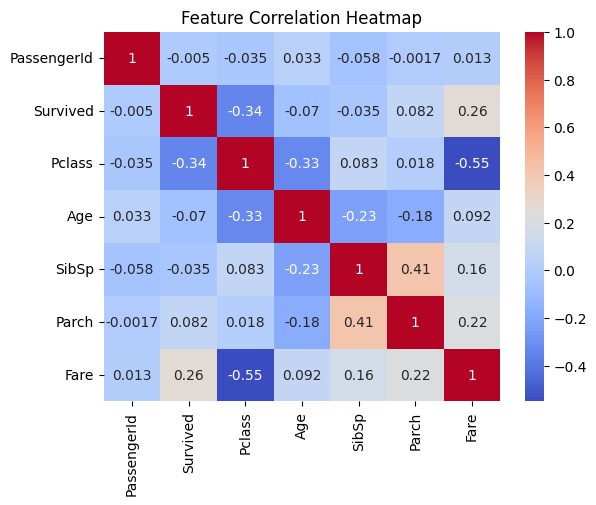

In [ ]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Now plot heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


🔟 Heatmap - Correlation Matrix
Observation:

Survival is positively correlated with Fare and Passenger Class.

Fare and Pclass show a negative correlation (higher Fare = lower Pclass).

Age has very weak correlation with Survival.

